<div style="background-color:#262626; text-align: center;">
<img src="https://fiapfunctions.blob.core.windows.net/datasets/capa.png">
</div>

# Practices

In [1]:
#!mkdir audios
!curl https://meriatdatasets.blob.core.windows.net/public/digital-audio-processing/OSR_us_000_0010_8k.wav -o audios/OSR_us_000_0010_8k.wav
!curl https://meriatdatasets.blob.core.windows.net/public/digital-audio-processing/simple_loop.wav -o audios/simple_loop.wav
!curl https://meriatdatasets.blob.core.windows.net/public/digital-audio-processing/brahms_hungarian_dance_5.mp3 -o audios/brahms_hungarian_dance_5.mp3
!curl https://meriatdatasets.blob.core.windows.net/public/digital-audio-processing/busta_rhymes_hits_for_days.mp3 -o audios/busta_rhymes_hits_for_days.mp3
!curl https://meriatdatasets.blob.core.windows.net/public/digital-audio-processing/c_strum.wav -o audios/c_strum.wav
!curl https://meriatdatasets.blob.core.windows.net/public/digital-audio-processing/oboe_c6.wav -o audios/oboe_c6.wav
!curl https://meriatdatasets.blob.core.windows.net/public/digital-audio-processing/seis.wav -o audios/seis.wav
    

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 88  525k   88  463k    0     0   289k      0  0:00:01  0:00:01 --:--:--  289k
100  525k  100  525k    0     0   327k      0  0:00:01  0:00:01 --:--:--  327k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 99270  100 99270    0     0   117k      0 --:--:-- --:--:-- --:--:--  117k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:

In [1]:
import librosa
import numba
import numpy as np
import librosa.display
import IPython.display as ipd
from scipy.fftpack import fft
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pathlib import Path

import audioread


In [15]:
audioread.audio_open('audios/seis.wav')

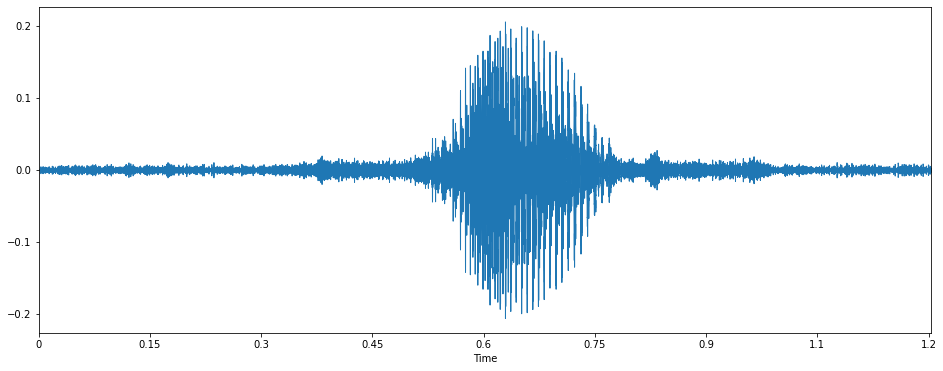

In [2]:
x, sr = librosa.load('audios/seis.wav')
plt.figure(figsize=(16, 6))
librosa.display.waveplot(x, sr=sr)
plt.show()

In [3]:
print(x[:10])

[ 3.3053184e-06 -2.9897710e-06 -6.6047673e-06 -3.5277192e-06
  3.4473683e-06  7.4087156e-06  4.3747696e-06 -2.8349530e-06
 -8.1784683e-06 -9.5208979e-06]


In [4]:
ipd.Audio('audios/seis.wav')


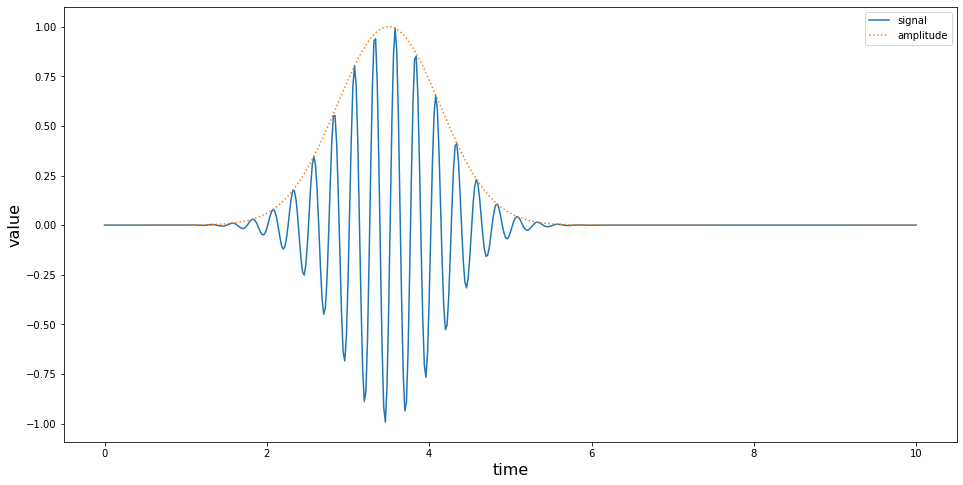

In [5]:
# Generate an amplitude modulated signal:
x = np.linspace(0, 10, 501)
ampl = np.exp(-(x - 3.5)**2 / 0.8)
y = np.sin(x * 25) * ampl

plt.figure(figsize=(16,8))
plt.plot(x, y, label='signal')
plt.plot(x, ampl, ':', label='amplitude')
plt.xlabel('time', fontsize=16)
plt.ylabel('value', fontsize=16)
plt.legend()
plt.show()

In [27]:
sample_rate = 8000 # amostras por segundo
T = 5.0 # segundos
t = np.linspace(0, T, int(T*sample_rate), endpoint=False) # time variable
x = 0.5 * np.sin(2 * np.pi * 440 * t) #uma onda senoidal pura de 440 Hz (ISO 16!)

np.linspace(0, T, int(T*sample_rate), endpoint=False) # time variable

array([0.000000e+00, 1.250000e-04, 2.500000e-04, ..., 4.999625e+00,
       4.999750e+00, 4.999875e+00])

In [28]:
ipd.Audio(x, rate=sample_rate) # Carrega a onda de 440Hz

In [29]:
y = 0.5*np.sin(2*np.pi*1000*t) #uma onda senoidal pura de 1000 Hz
ipd.Audio(y, rate=sample_rate) # Carrega a onda de 1000Hz

In [30]:
xy = x + y
ipd.Audio(xy, rate=sample_rate) # carrega o som de x + y

## 2. Sinais no domínio do Tempo *vs* domínio da Frequência

### Sinais no domínio do tempo

Quando reproduzimos os sons digitais, transformamos os sinais em ondas mecânicas, que na verdade representam as variações da amplitude no tempo.

Desenhamos as variações das amplitudes no tempo dos sinais x, y e xy, seguindo 1/8000 amostras por segundo

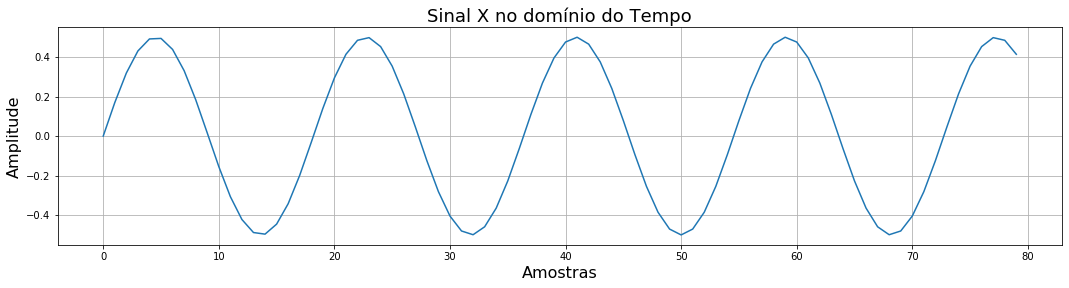

In [31]:
plt.figure(figsize=(18, 4))
plt.plot(x[:int(0.01*8000)])
plt.xlabel('Amostras', fontsize = 16)
plt.ylabel('Amplitude', fontsize = 16)
plt.title('Sinal X no domínio do Tempo', fontsize = 18)
plt.grid(True)
plt.show()

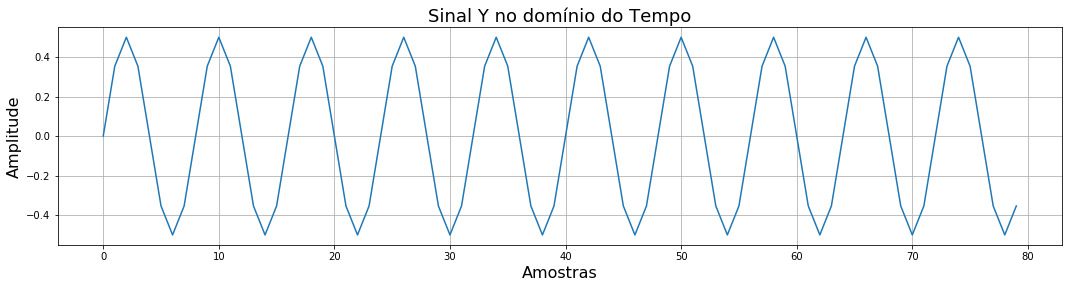

In [32]:
plt.figure(figsize=(18, 4))
plt.plot(y[:int(0.01*8000)])
plt.xlabel('Amostras', fontsize = 16)
plt.ylabel('Amplitude', fontsize = 16)
plt.title('Sinal Y no domínio do Tempo', fontsize = 18)
plt.grid(True)
plt.show()

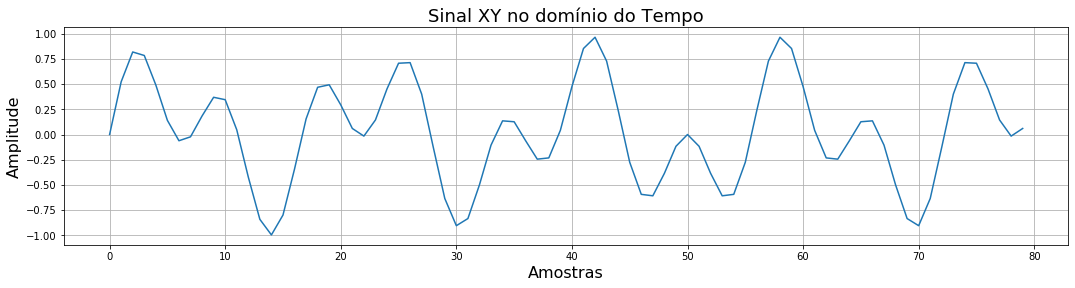

In [33]:
plt.figure(figsize=(18, 4))
plt.plot(xy[:int(0.01*8000)])
plt.xlabel('Amostras', fontsize = 16)
plt.ylabel('Amplitude', fontsize = 16)
plt.title('Sinal XY no domínio do Tempo', fontsize = 18)
plt.grid(True)
plt.show()

8000


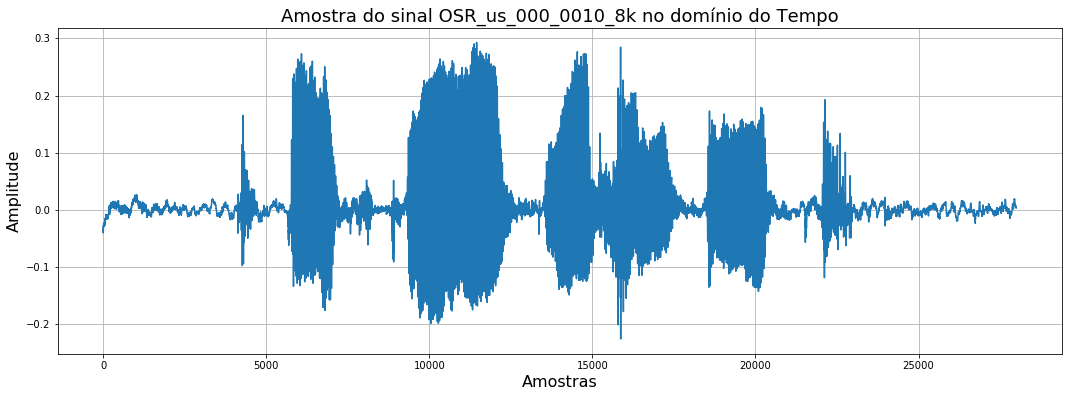

In [34]:
sinal_audio, sample_rate_sinal_audio = librosa.load('audios/OSR_us_000_0010_8k.wav', sr=None)
print(sample_rate_sinal_audio)
plt.figure(figsize=(18, 6))
plt.plot(sinal_audio[:int(3.5*sample_rate_sinal_audio)]) # 3.5 segundos do áudio
plt.xlabel('Amostras', fontsize = 16)
plt.ylabel('Amplitude', fontsize = 16)
plt.title('Amostra do sinal OSR_us_000_0010_8k no domínio do Tempo', fontsize = 18)
plt.grid(True)
plt.show()

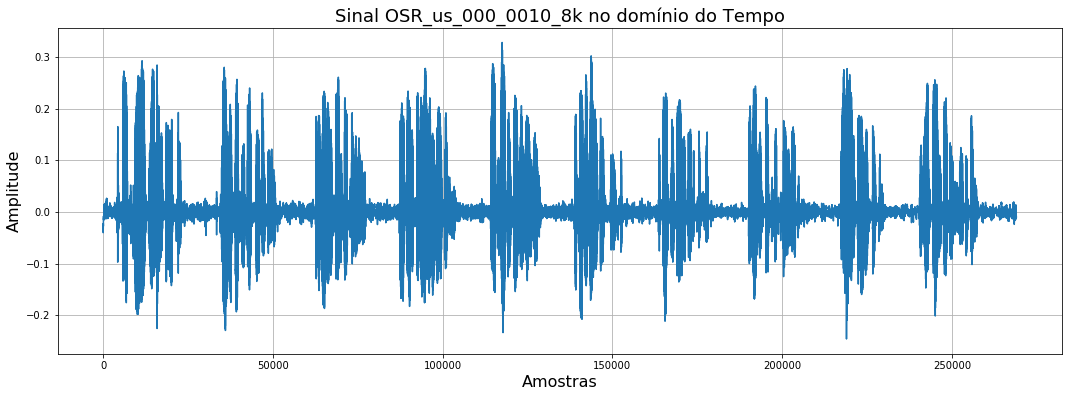

In [35]:
plt.figure(figsize=(18, 6))
plt.plot(sinal_audio)
plt.xlabel('Amostras', fontsize = 16)
plt.ylabel('Amplitude', fontsize = 16)
plt.title('Sinal OSR_us_000_0010_8k no domínio do Tempo', fontsize = 18)
plt.grid(True)
plt.show()

In [36]:
ipd.Audio(sinal_audio, rate=sample_rate_sinal_audio) # carrega o som do openspeech

# Domínio da Frequência

## Transformações entre tempo e domínio de frequência (FFT, PSD, onda)

A análise de Fourier é um campo de estudo utilizado para analisar a periodicidade em sinais (periódicos). Se um sinal contém componentes que são periódicos de natureza, a análise fourier pode ser usada para decompor este sinal em seus componentes periódicos. A análise de Fourier nos diz qual é a frequência desses componentes periódicos.

Por exemplo, se medirmos seu batimento cardíaco e no momento da medição você tiver uma frequência cardíaca de 60 batidas /minuto, o sinal terá uma frequência de $\large 1Hz$ (Período de $\large 1S$ = frequência de $\large 1Hz$). Se você está fazendo ao mesmo tempo, alguma tarefa repetitiva onde você move os dedos $\large 0.5Hz$ a $\large 2S$ cada dois $\large 0.5Hz$ segundos, o sinal que vai para sua mão terá uma frequência de (Período de = frequência de ). Um eletrodo colocado em seu braço.vai medir a combinação desses dois sinais. E uma análise fourier realizada nos sinais combinados, nos mostrará um pico no espectro de frequências a $\large 0,5Hz$ e um a $\large 1Hz$.

Assim, dois (ou mais) sinais diferentes (com diferentes frequências, amplitudes, etc) podem ser misturados para formar um novo sinal composto. O novo sinal então consiste em todos os seus sinais componentes.

O inverso também é verdade, cada sinal – não importa o quão complexo pareça – pode ser decomposto em uma soma de seus sinais mais simples. Estes sinais mais simples são funções trigonométricas (ondas sine e cosine). Isso foi descoberto (em 1822) por Joseph Fourier e é sobre o que é a [análise de Fourier](https://betterexplained.com/articles/an-interactive-guide-to-the-fourier-transform/). A função matemática que transforma um sinal do domínio do tempo para o domínio de frequência é chamada de Fourier Transform, e a função que faz o oposto é chamada de Inverso Fourier Transform.

Se você quiser saber como funciona a transformação de Fourier, a explicação lindamente animada da [3blue1brown](https://www.youtube.com/watch?v=spUNpyF58BY) lhe dará mais informações.

Abaixo, podemos ver isso em ação. Temos cinco ondas de seno (sinais azuis) com amplitudes 4, 6, 8, 10 e 14 e frequências 6.5, 5, 3, 1,5 e $\large 1Hz$. Combinando esses sinais, formamos um novo sinal composto (preto). O Fourier Transform transforma este sinal no domínio de frequência (sinal vermelho) e nos mostra em quais frequências o componente sinaliza oscilar.

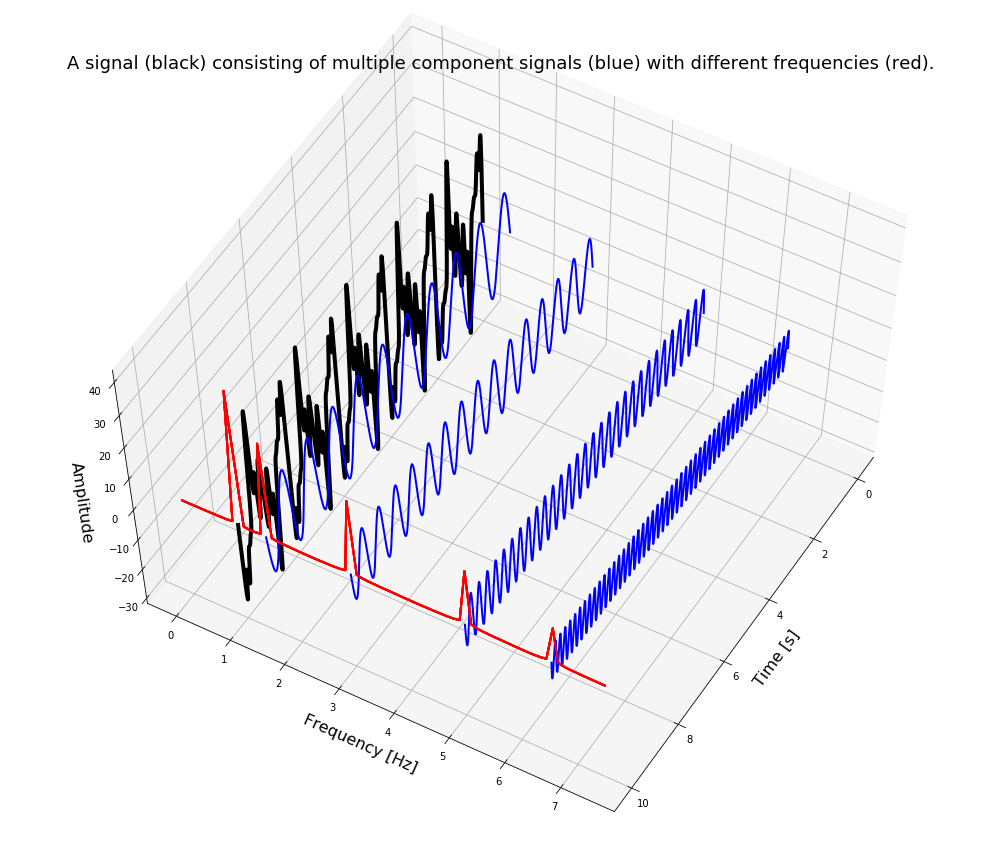

In [37]:
def get_fft_values(y_values, T, N, f_s):
    f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fft_values_ = fft(y_values)
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
    return f_values, fft_values
 
t_n = 10; N = 1000; T = t_n / N; f_s = 1/T
 
x_value = np.linspace(0,t_n,N)
amplitudes = [4, 6, 8, 10, 14]
frequencies = [6.5, 5, 3, 1.5, 1]
y_values = [amplitudes[ii]*np.sin(2*np.pi*frequencies[ii]*x_value) for ii in range(0,len(amplitudes))]
composite_y_value = np.sum(y_values, axis=0)
 
f_values, fft_values = get_fft_values(composite_y_value, T, N, f_s)
 
colors = ['k', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b']
 
fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(111, projection='3d')
plt.title('A signal (black) consisting of multiple component signals (blue) with different frequencies (red).', fontsize=18)
ax.set_xlabel("\nTime [s]", fontsize=16)
ax.set_ylabel("\nFrequency [Hz]", fontsize=16)
ax.set_zlabel("\nAmplitude", fontsize=16)
 
y_values_ = [composite_y_value] + list(reversed(y_values))
frequencies = [1, 1.5, 3, 5, 6.5]
 
try:
    for ii in range(0,len(y_values_)-1):
        signal = y_values_[ii]
        color = colors[ii]
        length = signal.shape[0]
        xx=np.linspace(0,10,1000)
        yy=np.array([frequencies[ii]]*length)
        zz=signal

        if ii == 0:
            linewidth = 4
        else:
            linewidth = 2
        ax.plot(list(xx), list(yy), zs=list(zz), linewidth=linewidth, color=color)

        xx=[10]*75
        yy=f_values[:75]
        zz = fft_values[:75]*3
        ax.plot(list(xx), list(yy), zs=list(zz), linewidth=2, color='red')

        plt.tight_layout()
except Exception as ex:
    print(ex)

ax.view_init(60, 30)
plt.show()

O Fast Fourier Transform (FFT) é um algoritmo eficiente para calcular o Discreto Fourier Transform (DFT) e é o padrão de fato para calcular um Fourier Transform. Está presente em quase todas as bibliotecas e pacotes de computação científica, em todas as linguagens de programação.

Hoje em dia a transformação de Fourier é uma ferramenta matemática indispensável usada em quase todos os aspectos do nosso cotidiano. Na próxima seção, veremos como podemos usar a FFT e outras técnicas de análise de sinais estocásticos para classificar séries de tempo e sinais.

## O FFT em Python

Em Python, o FFT de um sinal pode ser calculado com a biblioteca SciPy. Abaixo, podemos ver como podemos usar o SciPy para calcular a FFT do sinal composto acima, e recuperar os valores de frequência de seus sinais componentes.

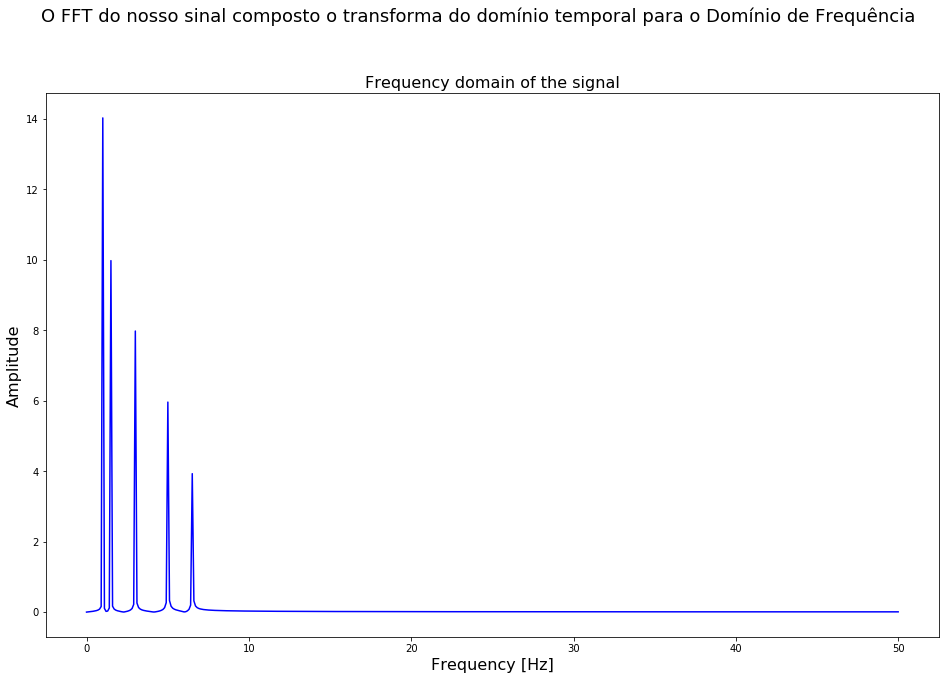

In [38]:
plt.figure(figsize=(16,10))
plt.plot(f_values, fft_values, linestyle='-', color='blue')
plt.xlabel('Frequency [Hz]', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.title("Frequency domain of the signal", fontsize=16)
plt.suptitle('O FFT do nosso sinal composto o transforma do domínio temporal para o Domínio de Frequência',fontsize=18, y=1)
plt.show()

Uma vez que nosso sinal $\large f_s 100Hz$ é amostrado a uma taxa de, $\large f_s / 2 = 50Hz$ a FFT devolverá o espectro de frequência até uma frequência de . Quanto maior for a taxa de amostragem, maior a frequência máxima é a FFT pode calcular.

Na função acima, a função retorna um vetor de frequências complexas valorizadas. Uma vez que são complexos valorizados, eles conterão uma parte real e imaginária. A parte real do valor complexo corresponde à magnitude, e à parte imaginária com a fase do sinal. Como só estamos interessados na magnitude das amplitudes, usamos para tomar a parte real do espectro de `frequências.get_fft_valuesscipy.fftpack.fftnp.abs()`.

O FFT de um sinal de entrada de pontos N, devolverá um vetor de pontos N. A primeira metade deste vetor (N/2 pontos) contém os valores úteis do $\large f_s / 2$ espectro de frequência de 0 Hz até a frequência de Nyquist de . A segunda metade contém a conjugada complexa e pode ser desconsiderada, uma vez que não fornece nenhuma informação útil.

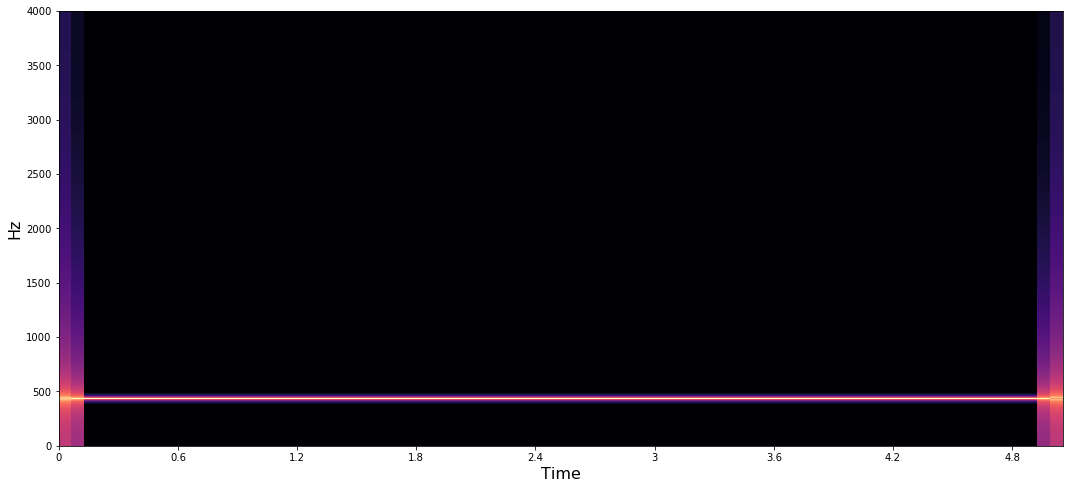

In [39]:
plt.figure(figsize=(18, 8))

X = librosa.stft(x)

Xdb = librosa.amplitude_to_db(np.abs(X))
Xdb = librosa.amplitude_to_db(np.abs(X))

librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.xlabel('Time', fontsize = 16), plt.ylabel('Hz', fontsize = 16)
plt.show()

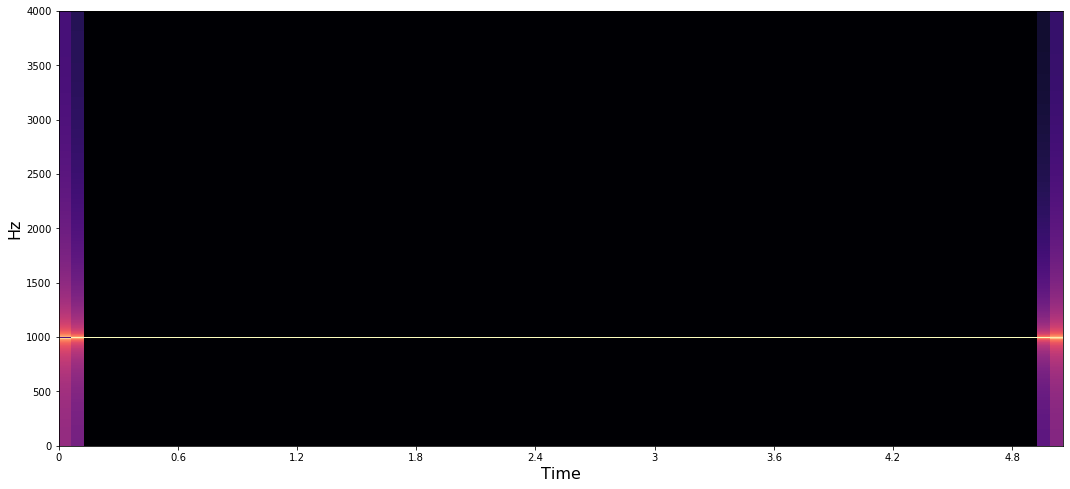

In [40]:
plt.figure(figsize=(18, 8))

Y = librosa.stft(y)
Ydb = librosa.amplitude_to_db(np.abs(Y))
librosa.display.specshow(Ydb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.xlabel('Time', fontsize = 16), plt.ylabel('Hz', fontsize = 16)
plt.show()

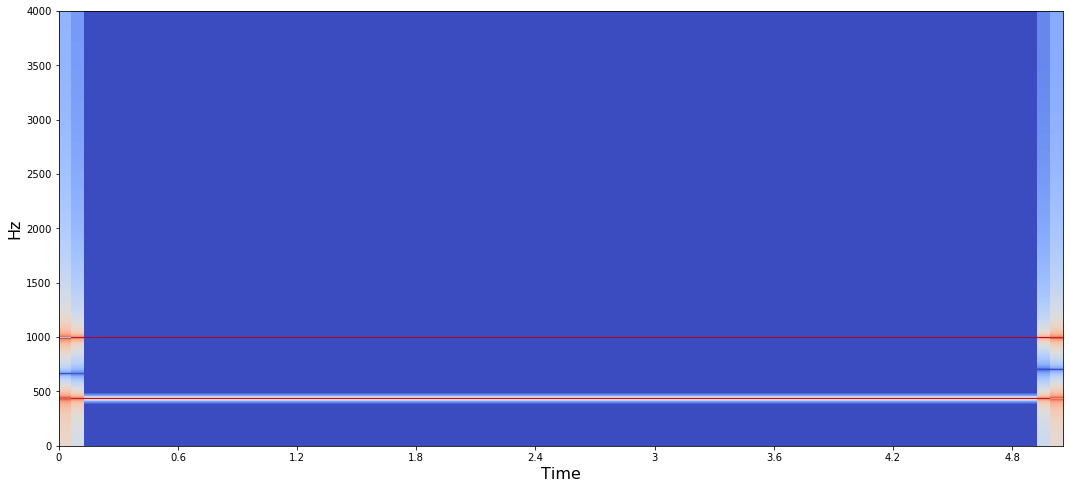

In [41]:
plt.figure(figsize=(18, 8))

XY = librosa.stft(xy)
XYdb = librosa.amplitude_to_db(np.abs(XY))
librosa.display.specshow(XYdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.xlabel('Time', fontsize = 16), plt.ylabel('Hz', fontsize = 16)
plt.show()

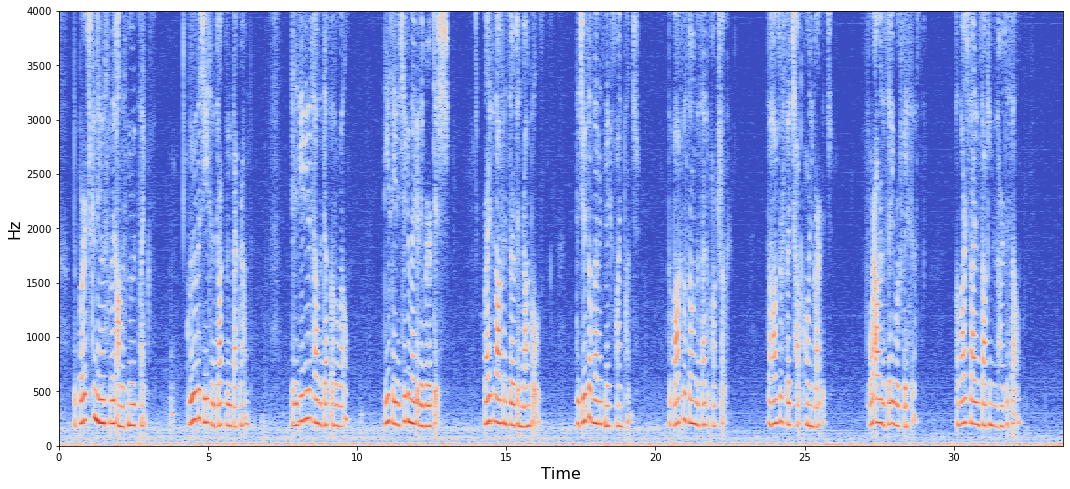

In [42]:
plt.figure(figsize=(18, 8))

SINAL_AUDIO = librosa.stft(sinal_audio)
SINAL_AUDIOdb = librosa.amplitude_to_db(np.abs(SINAL_AUDIO))
librosa.display.specshow(SINAL_AUDIOdb, sr=sample_rate_sinal_audio, x_axis='time', y_axis='hz')
plt.xlabel('Time', fontsize = 16), plt.ylabel('Hz', fontsize = 16)
plt.show()

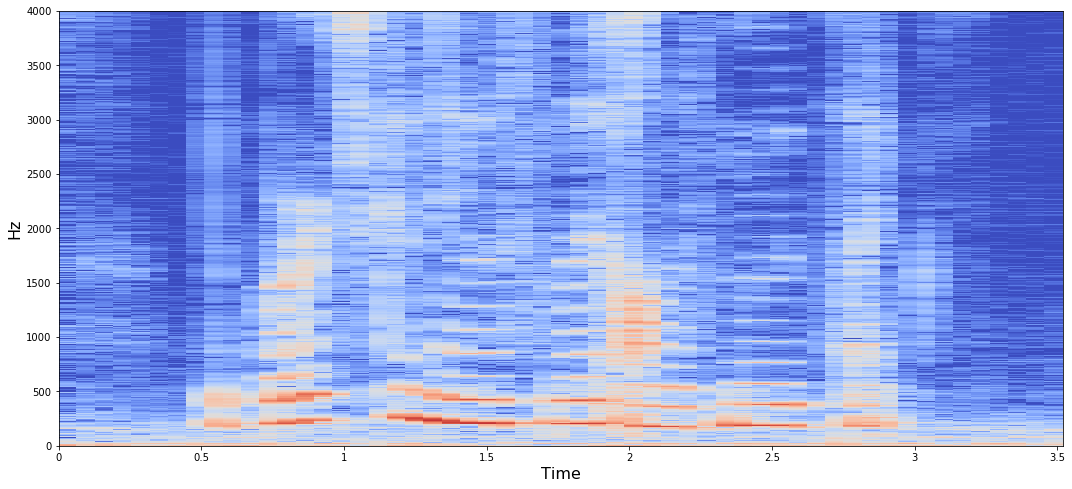

In [43]:
plt.figure(figsize=(18, 8))

SINAL_AUDIO = librosa.stft(sinal_audio[0:int(3.5 * sample_rate)])
SINAL_AUDIOdb = librosa.amplitude_to_db(np.abs(SINAL_AUDIO))
librosa.display.specshow(SINAL_AUDIOdb, sr=sample_rate_sinal_audio, x_axis='time', y_axis='hz')
plt.xlabel('Time', fontsize = 16), plt.ylabel('Hz', fontsize = 16)
plt.show()

## 3. Sinais no domínio da Frequência *vs* log-Mels

O ouvido humano não distingue as frequencias com a mesma precisão e não ouve todas as frequências com a mesma intensidade.

A cóclea é o orgão é responsável pela transformação dos sinais acústicos em sinais neurais. É um canal espiral ósseo que está dividido e possui uma forma que lembra a concha de um caracol, localizado no interior do osso temporal (estrutura óssea densa, altamente mineralizada e de acesso difícil).

<div align="center" style="width: 100%;">
    <img src="imgs/ear-diagram-picture.jpg" style="width: 900px">
</div>

### Percepção da Cóclea comparada com o Piano

<div align="center" style="width: 100%;">
    <img src="imgs/Coclea-Piano-Graphics.jpg" style="width: 550px">
</div>

### Percepção da Cóclea versus distância percorrida no canal

<div align="center" style="width: 100%;">
    <img src="imgs/tonotopic-principal-of-the-cochlea.jpg" style="width: 400px">
</div>

Assim, várias escalas baseadas na percepção surgiram no passado, a fim de simular este efeito natural que existe no humano. uma delas é a [escala Mel](https://en.wikipedia.org/wiki/Mel_scale). Ela segue este mapa entre as frequências naturais do som e as percebidas pelo ouvido humano:


<div align="center" style="width: 100%;">
    <img src="imgs/Mel-Hz_plot.svg" style="width: 900px">
</div>

Para converter Hertz ($f$) em Mel ($m$) nós usamos as seguintes equações:

$$\Large m = 2595 \log_{10} (1 + \frac{f}{700})$$

$$\Large f = 700 (10^{m/2595} - 1) $$

### Taxa de cruzamento por zero

A taxa de cruzamento por zero é uma característica que nos ajuda a entender o conteúdo da frequência do sinal. Esta taxa pode ser calculada por:

$$ Z = \frac{1}{2(N-1)} \sum_{i=1}^{N-1} \left|\text{sign}(s_i) - \text{sign}(s_{i-1})\right| \\ \text{Onde: } \text{sign}(s_i) = \left\{ \begin{array}{rl} 1, & \text{se } s_i \geq 0\\ -1, & \mbox{se } s_i < 0 \end{array} \right. $$

Em relação a taxa de cruzamento por zero, devemos considerar que $0 \leq Z \leq 1$, ou seja, quando mais próximo $Z$ for de 1, significa que o conteúdo em relação a frequência é maior. 

Utilizando o pacote librosa, é possível computar a quantidade de travessias do zero que ocorreram em um dado sinal. No trecho de código abaixo, utilizando o método zero_crossings, informamos um sinal (aqui representado por signal), e obtemos um array com todas as incidências calculadas.

```python
zero_crossings = librosa.zero_crossings(signal, pad=False)
print(sum(zero_crossings))
```

### Autocorrelation

A autocorrelação ([autocorrelation](http://en.wikipedia.org/wiki/Autocorrelation)) de um sinal descreve a semelhança de um sinal contra uma versão diferenciada de tempo de si mesmo. Para um sinal $x$, a autocorrelação $r$ é:

$\Large r(k) = \sum_n x(n) x(n-k) $, onde $k$ é frequentemente chamado de parâmetro **lag**. 

A autocorrelação é útil para encontrar padrões repetidos em um sinal. Por exemplo, em problemas de defasagem curta, a autocorrelação pode nos dizer algo sobre a frequência fundamental do sinal. Para atrasos mais longos, a autocorrelação pode nos dizer coisas como informações sobre o ritmo de um sinal musical.

O processo de autocorrelação em sinais de áudio, descreve a semelhança de um sinal comparando uma versão sua deslocada no tempo (segmentos). O resultado da autocorrelação é uma medida de similaridade entre os segmentos comparados. Dado um sinal $x$, sua autocorrelação $r$ é definida matematicamente por:

A autocorrelação é muito utilizada para encontrar padrões repetidos em um mesmo sinal \cite{rabiner2010theory}. O resultado da autocorrelação fornece informações sobre a frequência fundamental, ou até mesmo sobre o ritmo no caso de um sinal musical.

É possível calcular a autocorrelação de um sinal utilizando a biblioteca librosa, informando apenas o sinal (signal) e o tamanho máximo do sinal a ser considerado. O resultado será um array contendo os valores calculados para cada segmento.

In [44]:
x, sr = librosa.load('audios/c_strum.wav')
ipd.Audio(x, rate=sr)

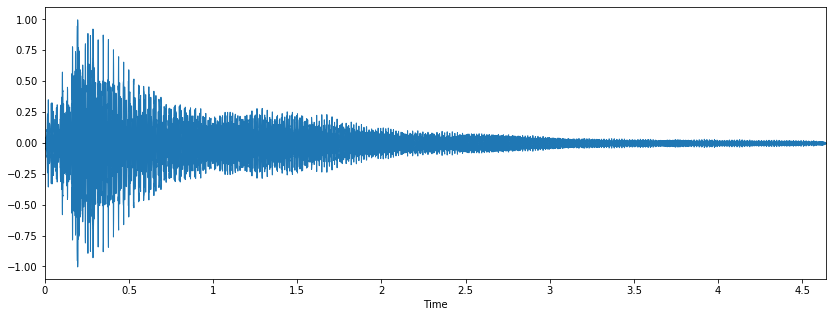

In [45]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr)
plt.show()

### `numpy.correlate`

Há duas maneiras de calcular a autocorrelação em Python. O primeiro é o método [`numpy.correlate`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.correlate.html):

In [46]:
r = np.correlate(x, x, mode='full')[len(x)-1:]
print(x.shape, r.shape)

(102400,) (102400,)


### `librosa.autocorrelate`

O segundo método é utilizar diretamente o [`librosa.autocorrelate`](http://bmcfee.github.io/librosa/generated/librosa.core.autocorrelate.html#librosa.core.autocorrelate):

In [47]:
r = librosa.autocorrelate(x, max_size=10000)
print(r.shape)

(10000,)


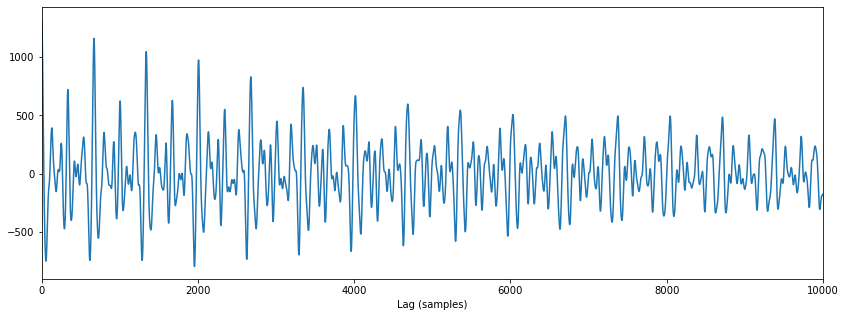

In [48]:
plt.figure(figsize=(14, 5))
plt.plot(r)
plt.xlabel('Lag (samples)')
plt.xlim(0, 10000)
plt.show()

`librosa.autocorrelate` convenientemente só mantém metade da função de autocorrelação, uma vez que a função de autocorrelação é simétrica. Além disso, a utilização do parâmetro `max_size` evita cálculos.

## Pitch Estimation

A autocorrelação é usada para encontrar padrões repetidos dentro de um sinal. Para sinais musicais, um padrão repetido pode corresponder a um período de pitch, ou no geral, o tom da música. 

Podemos, portanto, usar a função de autocorrelação para estimar o tom em um sinal musical.

In [49]:
x, sr = librosa.load('audios/oboe_c6.wav')
ipd.Audio(x, rate=sr)

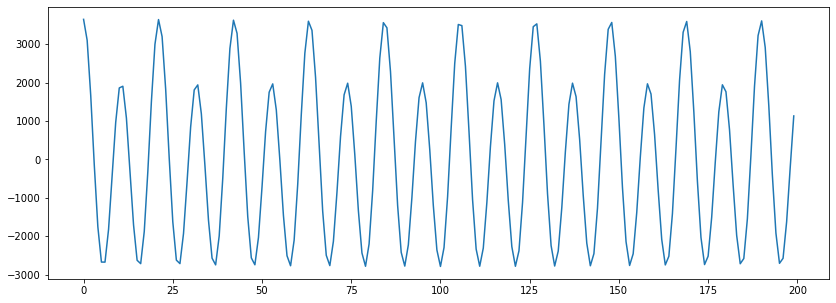

In [50]:
r = librosa.autocorrelate(x, max_size=5000)
plt.figure(figsize=(14, 5))
plt.plot(r[:200])
plt.show()

A autocorrelação sempre tem um máximo de zero, ou seja, zero lag. Queremos identificar o máximo fora do pico centrado em zero. Portanto, podemos escolher apenas pesquisar dentro de uma gama de arremessos razoáveis:

In [51]:
midi_hi = 120.0
midi_lo = 12.0
f_hi = librosa.midi_to_hz(midi_hi)
f_lo = librosa.midi_to_hz(midi_lo)
t_lo = sr/f_hi
t_hi = sr/f_lo

print(f_lo, f_hi)
print(t_lo, t_hi)

16.351597831287414 8372.018089619156
2.633773573344376 1348.4920695523206


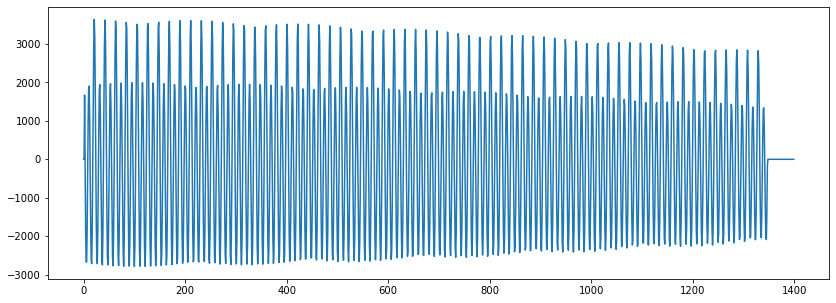

In [52]:
r[:int(t_lo)] = 0
r[int(t_hi):] = 0

plt.figure(figsize=(14, 5))
plt.plot(r[:1400])
plt.show()

In [53]:
# Encontra o ponto de valor máximo:

t_max = r.argmax()
print(t_max)

21


Neste ponto, vamos estimar o **tom** em Hertz:

In [54]:
float(sr)/t_max

1050.0

Na verdade, isso é muito próximo da frequência real de um **C6**:

In [55]:
librosa.midi_to_hz(84)

1046.5022612023945

<div align="center" style="width: 100%;">
    <img src="http://newt.phys.unsw.edu.au/jw/graphics/notes.GIF">
    <h4 style="font-family: courier; font-size: .8em;">ref: http://newt.phys.unsw.edu.au/jw/notes.html</h4>
</div>

# Genre Recognition

Carregando 30 segundos para verificação/exploração.

In [56]:
filename_brahms = 'audios/brahms_hungarian_dance_5.mp3'
#filename_brahms = 'audios/c_strum.wav'

x_brahms, sr_brahms = librosa.load(filename_brahms)

C:\ProgramData\Anaconda3\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


NoBackendError: 

In [19]:
filename_busta = 'audios/busta_rhymes_hits_for_days.mp3'

x_busta, sr_busta = librosa.load(filename_busta, duration=30)

NoBackendError: 

In [ ]:
ipd.Audio(x_brahms, rate=sr_brahms)

In [ ]:
ipd.Audio(x_busta, rate=sr_busta)

In [ ]:
plt.figure(figsize=(18, 4))
librosa.display.waveplot(x_brahms, sr_brahms)
plt.show()

In [ ]:
plt.figure(figsize=(18, 4))
librosa.display.waveplot(x_busta, sr_busta)
plt.show()

In [ ]:
# Computar o melspectrogram de potência:
S_brahms = librosa.feature.melspectrogram(x_brahms, sr=sr_brahms, power=2.0)
S_busta = librosa.feature.melspectrogram(x_busta, sr=sr_busta, power=2.0)

# Converter amplitude em decibéis:
Sdb_brahms = librosa.power_to_db(S_brahms)
Sdb_busta = librosa.power_to_db(S_busta)

In [ ]:
plt.figure(figsize=(18, 6))
librosa.display.specshow(Sdb_brahms, sr=sr_brahms, x_axis='time', y_axis='mel')
plt.colorbar()
plt.show()

In [ ]:
plt.figure(figsize=(18, 6))
librosa.display.specshow(Sdb_busta, sr=sr_busta, x_axis='time', y_axis='mel')
plt.colorbar()
plt.show()

In [ ]:
!curl https://meriatdatasets.blob.core.windows.net/public/digital-audio-processing/hello.wav -o audios/hello.wav
!curl https://meriatdatasets.blob.core.windows.net/public/digital-audio-processing/head.wav -o audios/head.wav

# Debulhando o Spectrogram

Ref: [link to sounds](http://www.ultimaserial.com/UltimaSound.html)

In [ ]:
def plot_mel_spec(file_name):
    x, sr = librosa.load(f'audios/{file_name}.wav')
    plt.figure(figsize=(16, 2))
    librosa.display.waveplot(x, sr)
    plt.axis(False)
    plt.show()

    S = librosa.feature.melspectrogram(x, sr=sr)
    Sdb = librosa.power_to_db(S)

    plt.figure(figsize=(16, 8))
    librosa.display.specshow(Sdb, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar()
    plt.show()

In [ ]:
plot_mel_spec('hello')

In [ ]:
plot_mel_spec('head')